# Experiment Summary (16.08 19:00)

- *Normalization*: Z-score normalization performed per bin
- *Devices*: 18
- *Workers*: 12
- *Participants*: 12 (each participant is assigned to 2 workers with RR policy)
- *Epochs*: 9 epochs for each source
- *Input Vector*: 70 x 1
- *CNN Layers*: 3 layers with 64 filters in the first two layers and 32 filters in the last layer
- *Max Pooling*: Applied twice with a size of 2 x 1
- *Kernel Size*: 5 x 1 x 1
- *Flatten*: Applied after CNN layers before the fully connected layers
- *Fully Connected Layers*: 256, 128, 64, 32, 16, 9
- *Activation Function (before the last layer)*: Tanh
- *Last Layer Type*: Probabilistic with softmax function
- *Loss Method*: Cross-Entropy (CE)
- *Learning Rate*: 0.00001
- *Regularization*: L2 applied
- *Optimizer*: SGD

*Training Phases*:
- *Phases 1-2*: Participants 1-6
- *Phases 3-4*: Participants 7-12

*Prediction Phases*: 
- *Phase 1*: Participants 1-6
- *Phase 2*: Participants 7-12


In [1]:
import set_jupyter_env
from apiServer import *
import pandas as pd 

In [2]:
API = ApiServer()

# Experiment Initialization

In [3]:
API.showJsons()


Distributed Configuration Files
--------------------

0.	dc_10w_14d_8r_3s_10c_synt.json
1.	dc_12w_12c_13d_4s_4r_tiles_rr.json
2.	dc_5d_4c_4s_4r_12w.json
3.	dc_AEC_1d_2c_1s_4r_4w.json
4.	dc_EEG_18d_12c_6s_10r_12w_CE.json
5.	dc_EEG_18d_12c_6s_10r_12w_FL.json
6.	dc_EEG_1d_2c_1s_4r_4w.json
7.	dc_EEG_1d_2c_1s_4r_4w_FL.json
8.	dc_EEG_8d_3c_3s_5r_3w_RR.json
9.	dc_EEG_8d_8c_3s_5r_8w_RR.json
10.	dc_FedTorchTest_5d_2s_2r_4c_4w.json
11.	dc_dist_14d.json
12.	dc_dist_2d_3c_2s_3r_6w.json
13.	dc_fed_dist_14d.json
14.	dc_fed_dist_2d_3c_2s_3r_6w.json
15.	dc_fed_synt_1d_2c_2r_1s_4w_1ws.json
16.	dc_mnist_13d_12w_4r_3s_3tokens.json
17.	dc_mnist_4w_5d_4r_4s_rr.json
18.	dc_synt_8d_8w_2c_4s_4r.json
19.	dc_synt_8d_8w_4c_6r_4s.json
20.	dc_synt_distributed_w5_c3_6r_3s_3d.json
21.	dc_test_synt_1d_2c_1s_4r_4w.json
22.	dc_test_synt_1d_2c_2s_4r_4w.json

Connection Map Files
--------------------

0.	conn_1Router1Client1S.json
1.	conn_1Router1Client2S.json
2.	conn_1Router2Clients1S.json
3.	conn_1Router3Clients1S.jso

In [4]:
dc = 4
conn = 26
exp = 7
API.setJsons(dc , conn , exp)

In [5]:
dc_path , conn_path , exp_path = API.getUserJsons()

In [51]:
exp_name = "EEG_Emotion_18Devices_12Persons_RR"
API.initialization(exp_name, dc_path, conn_path, exp_path)

AssertionError: experiment name exists!

# Connection Map:

Note: you may need to restart the kernel to use updated packages.
Connections:  [('rms', ['mainServer', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9']), ('r1', ['c1', 'c2', 'r2']), ('r2', ['c3', 'c4', 'r3']), ('r3', ['c5', 'c6', 'r4']), ('r4', ['c7', 'c8', 'r5']), ('r5', ['c9', 'c10', 'r6']), ('r6', ['c11', 'c12', 'r7']), ('r7', ['s1', 's2', 'r8', 'r4', 'r2', 'r5', 'r3', 'r1']), ('r8', ['s3', 's4', 'r9', 'r3', 'r4', 'r1', 'r2']), ('r9', ['s5', 's6', 'r3', 'r5', 'r1', 'r6', 'r2', 'r4'])]
Routers:  ['rms', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9']
Workers:  ['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10', 'w11', 'w12']
Adding edge (rms , mainServer) to graph
Adding edge (rms , r1) to graph
Adding edge (rms , r2) to graph
Adding edge (rms , r3) to graph
Adding edge (rms , r4) to graph
Adding edge (rms , r5) to graph
Adding edge (rms , r6) to graph
Adding edge (rms , r7) to graph
Adding edge (rms , r8) to graph
Adding edge (rms , r9) to graph
Adding edge (r1

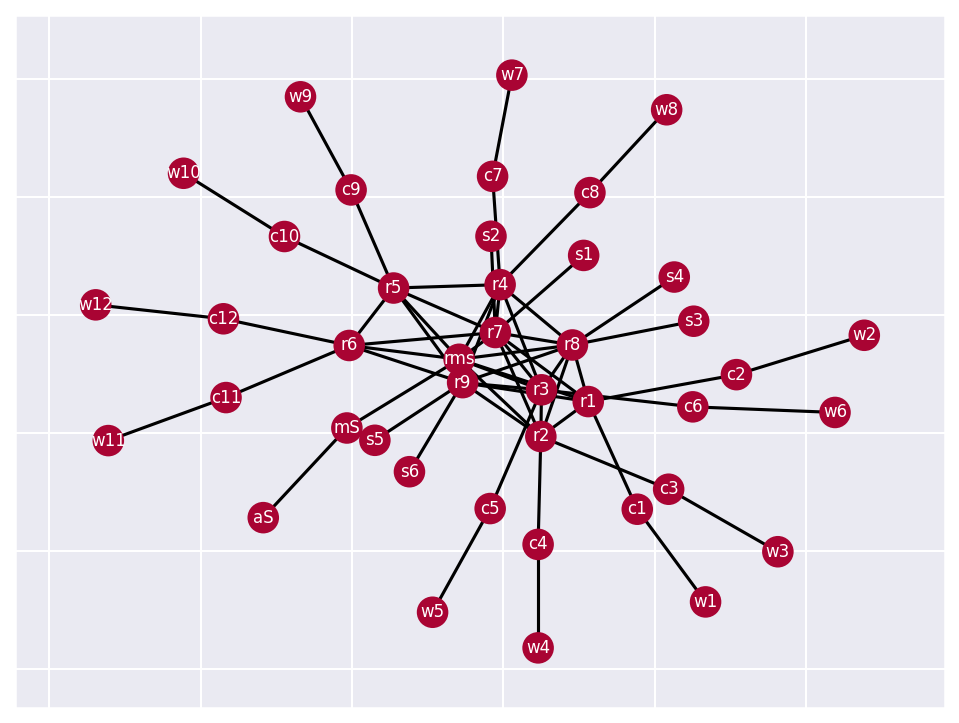

In [7]:
%pip install networkx pygraphviz
import networkx as nx
def visualize_nerlnet_graph(api_server_inst,  connections : dict , components): # connections is a dictionary with keys as routers and values as lists of their neighbors
    print("Connections: " , list(connections.items()))
    routers = list(connections.keys())
    print("Routers: " , routers)
    workers = list(components.map_worker_to_client.keys())
    print("Workers: " , workers)
    graph = nx.Graph()
    nodes = routers + components.sources + components.clients + workers + [API_SERVER_STR , MAIN_SERVER_STR]
    edges = [] # list of tuples
    for router , neighbors in list(connections.items()):
        for neighbor in neighbors:
            if (router,neighbor) not in edges:
                print(f"Adding edge ({router} , {neighbor}) to graph")
                edges.append((router , neighbor))
    edges.append((API_SERVER_STR , MAIN_SERVER_STR)) # Always connected
    for worker in workers:
        edges.append((worker , components.map_worker_to_client[worker]))
    graph.add_nodes_from(nodes)
    graph.add_edges_from(edges)
    
    my_labels = {'mainServer': 'mS' , 'apiServer': 'aS'}
    nx.relabel_nodes(graph, my_labels , copy=False)
    
    default_colors = {node:'#A90433' for node in graph.nodes()}
    node_colors = {node:default_colors[node] for node in graph.nodes()}
    nx.set_node_attributes(graph, node_colors, 'color')
    colors = nx.get_node_attributes(graph, 'color').values()

    pos = nx.nx_agraph.graphviz_layout(graph)
    angle = 100
    
    plt.figure(figsize=(8,6),dpi=150)
    nx.draw_networkx(graph, pos, with_labels=True, node_color=colors , node_size=200, font_size=8, font_color='white' , edge_color='black' , width=1.5)
    plt.show()
visualize_nerlnet_graph(API , API.json_dir_parser.json_from_path(conn_path)['connectionsMap'] , globe.components)

In [8]:
API.send_jsons_to_devices()

[INFO][2024-08-16 15:57:41,728] Sending distributed configurations to devices is completed


## Training phase 1:

In [9]:
API.run_current_experiment_phase()

[INFO][2024-08-16 15:57:41,734] Experiment phase: training_phase1 of type training starts running...
[INFO][2024-08-16 15:57:41,735] Sending data to sources
[INFO][2024-08-16 15:58:04,841] Data is ready in sources
[INFO][2024-08-16 15:58:04,842] Phase training requested from Main Server
[INFO][2024-08-16 16:16:03,501] Processing experiment phase data
[INFO][2024-08-16 16:16:03,935] Processing experiment phase data completed
[INFO][2024-08-16 16:16:03,936] Start generating communication statistics for training_phase1 of type training
[INFO][2024-08-16 16:16:03,936] Statistics requested from Main Server
[INFO][2024-08-16 16:16:03,989] Statistics received from Main Server
[INFO][2024-08-16 16:16:03,991] Phase of training_phase1 training completed


In [10]:
stats_train1 = API.get_experiment_flow(exp_name).generate_stats()

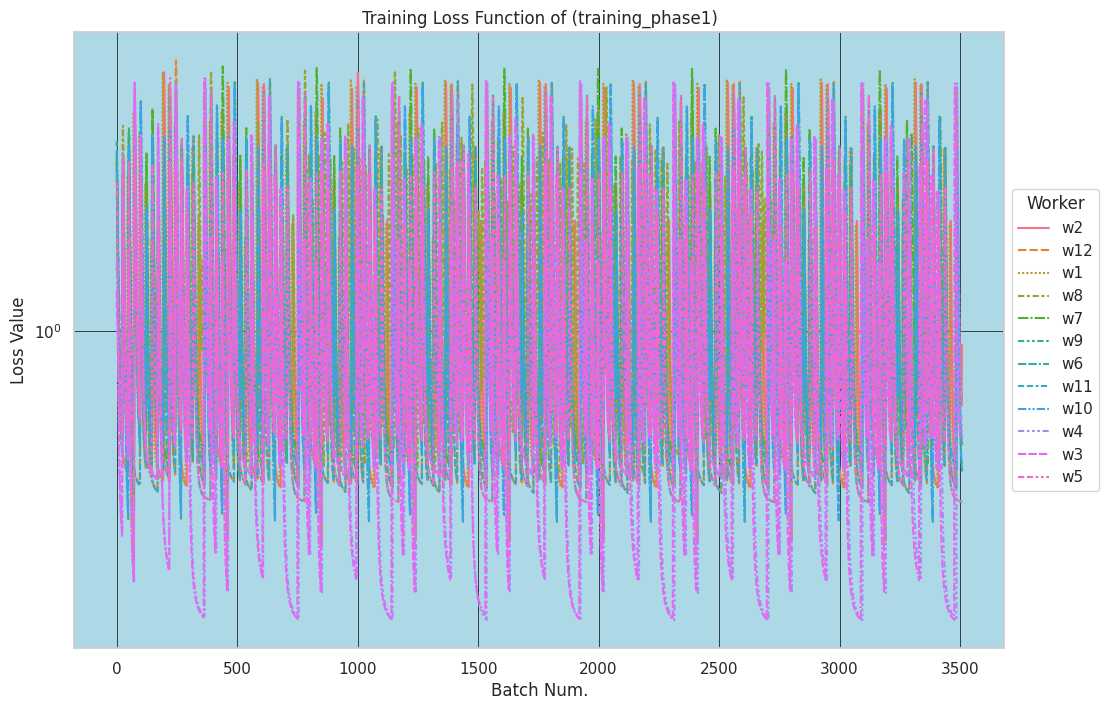

In [11]:
df_loss1 = stats_train1.get_loss_ts(plot=True, smoothing = True, log_plot = True)

In [12]:
directory = '/home/nerlnet/workspace/NErlNet/experiments_results/discretization'
os.makedirs(directory, exist_ok=True)
filename = f'train1_loss.csv'
filepath = os.path.join(directory, filename)
df_loss1.to_csv(filepath)

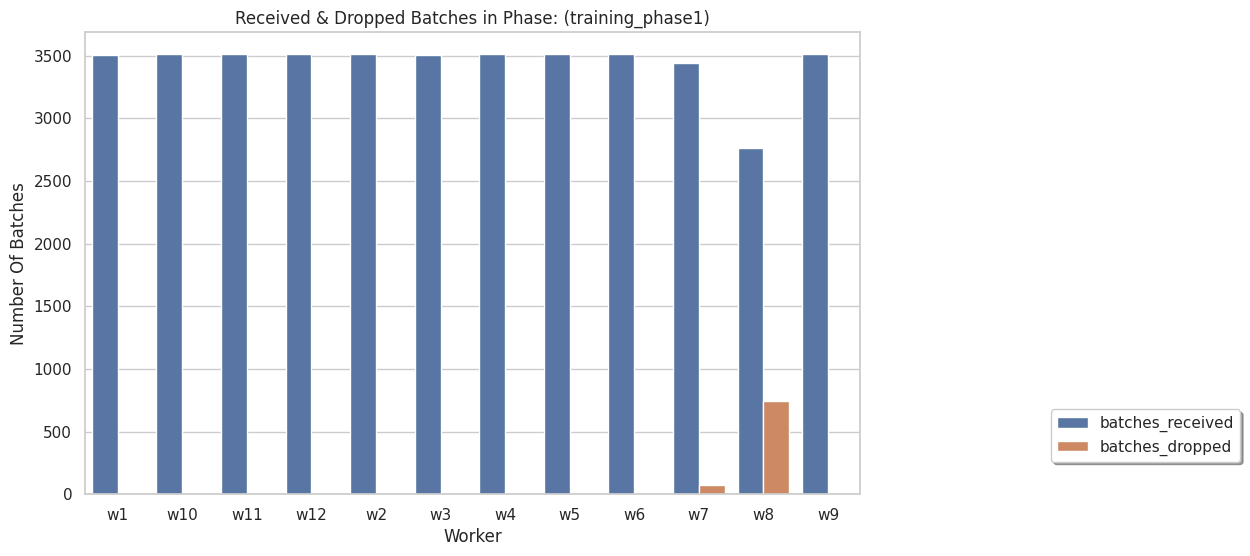

In [13]:
recieved_train = stats_train1.get_recieved_batches()
missed_train = stats_train1.get_missed_batches()
stats_train1.plot_batches_status(plot=True)

In [14]:
folder_path = "/home/nerlnet/workspace/NErlNet/experiments_results/discretization"  
file_name = "recieved_batches_train_1.json"
file_path = os.path.join(folder_path, file_name)

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(recieved_train, json_file)

file_name = "missed_batches_train_1.json"
file_path = os.path.join(folder_path, file_name)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(missed_train, json_file)

## Training phase 2:

In [15]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-08-16 16:16:07,510] Experiment phase: training_phase2 of type training starts running...
[INFO][2024-08-16 16:16:07,512] Sending data to sources
[INFO][2024-08-16 16:16:30,209] Data is ready in sources
[INFO][2024-08-16 16:16:30,210] Phase training requested from Main Server
[INFO][2024-08-16 16:34:28,522] Processing experiment phase data
[INFO][2024-08-16 16:34:28,827] Processing experiment phase data completed
[INFO][2024-08-16 16:34:28,828] Start generating communication statistics for training_phase2 of type training
[INFO][2024-08-16 16:34:28,828] Statistics requested from Main Server
[INFO][2024-08-16 16:34:28,882] Statistics received from Main Server
[INFO][2024-08-16 16:34:28,883] Phase of training_phase2 training completed


In [16]:
stats_train2 = API.get_experiment_flow(exp_name).generate_stats()

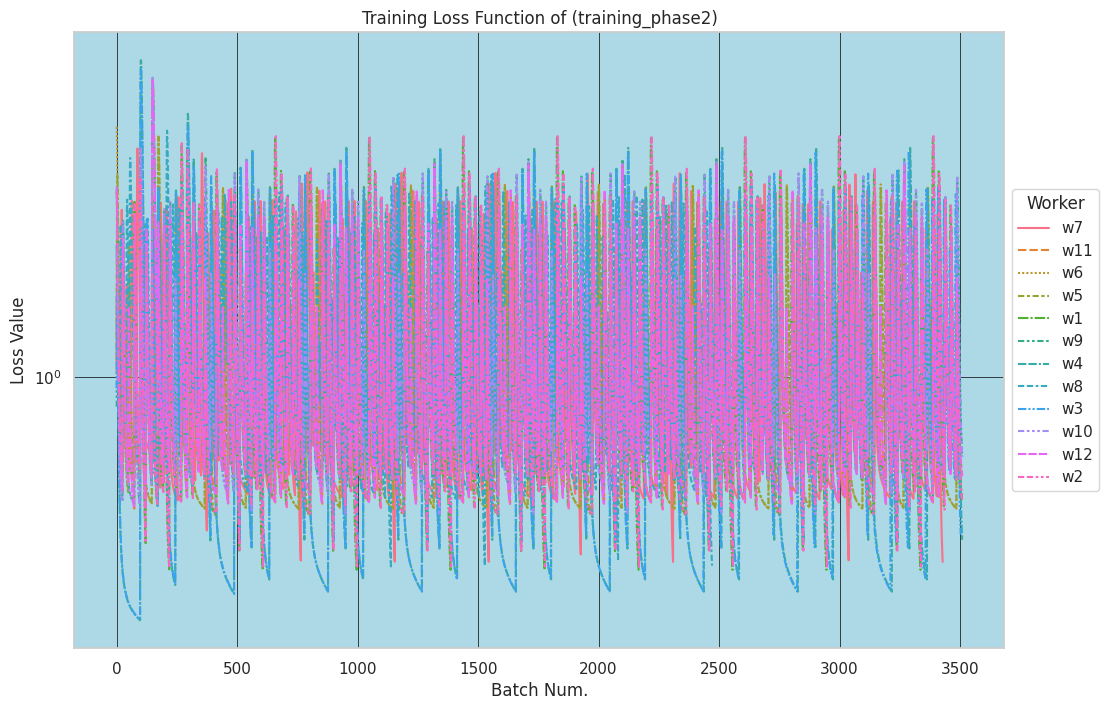

In [17]:
df_loss2 = stats_train2.get_loss_ts(plot=True, smoothing = True, log_plot = True)

In [18]:
os.makedirs(directory, exist_ok=True)
filename = f'train2_loss.csv'
filepath = os.path.join(directory, filename)
df_loss2.to_csv(filepath)

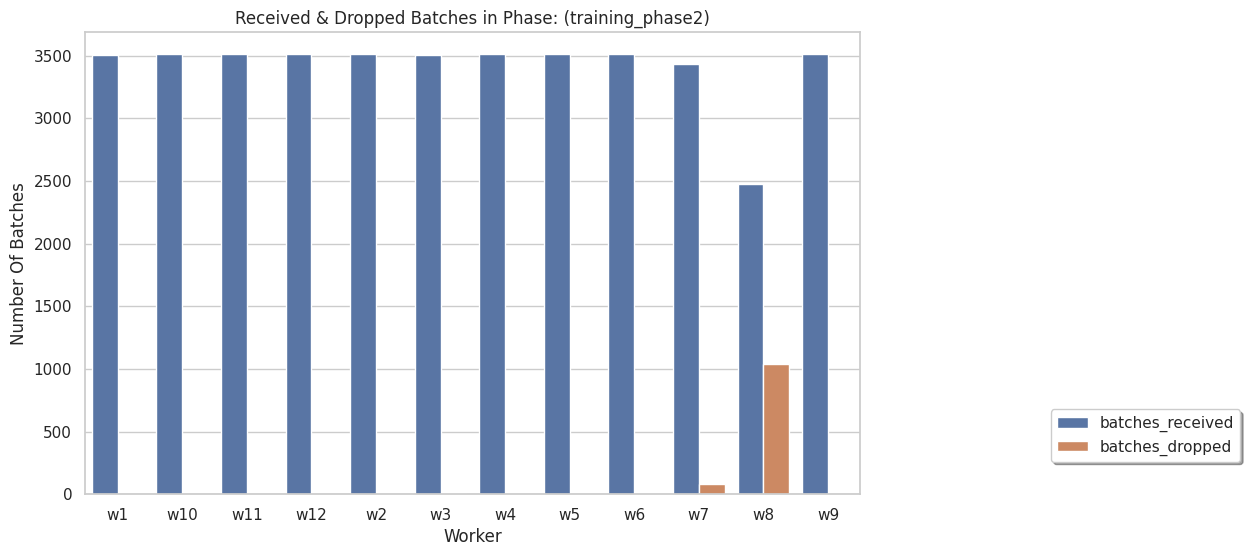

In [19]:
recieved_train = stats_train2.get_recieved_batches()
missed_train = stats_train2.get_missed_batches()
stats_train2.plot_batches_status(plot=True)

In [20]:
file_name = "recieved_batches_train_2.json"
file_path = os.path.join(folder_path, file_name)

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(recieved_train, json_file)

file_name = "missed_batches_train_2.json"
file_path = os.path.join(folder_path, file_name)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(missed_train, json_file)

## Training phase 3:

In [21]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-08-16 16:34:32,312] Experiment phase: training_phase3 of type training starts running...
[INFO][2024-08-16 16:34:32,313] Sending data to sources
[INFO][2024-08-16 16:34:56,502] Data is ready in sources
[INFO][2024-08-16 16:34:56,503] Phase training requested from Main Server
[INFO][2024-08-16 16:52:54,835] Processing experiment phase data
[INFO][2024-08-16 16:52:55,153] Processing experiment phase data completed
[INFO][2024-08-16 16:52:55,154] Start generating communication statistics for training_phase3 of type training
[INFO][2024-08-16 16:52:55,154] Statistics requested from Main Server
[INFO][2024-08-16 16:52:55,207] Statistics received from Main Server
[INFO][2024-08-16 16:52:55,209] Phase of training_phase3 training completed


In [22]:
stats_train3 = API.get_experiment_flow(exp_name).generate_stats()

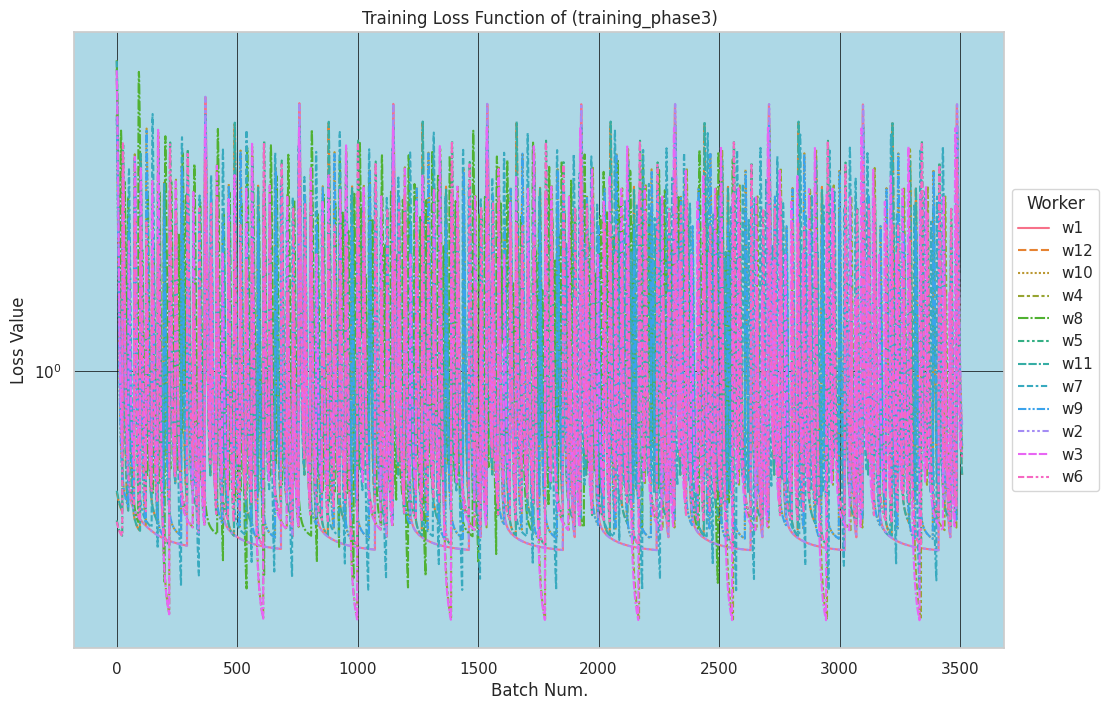

In [23]:
df_loss3 = stats_train3.get_loss_ts(plot=True, smoothing = True, log_plot = True)

In [24]:
os.makedirs(directory, exist_ok=True)
filename = f'train3_loss.csv'
filepath = os.path.join(directory, filename)
df_loss3.to_csv(filepath)

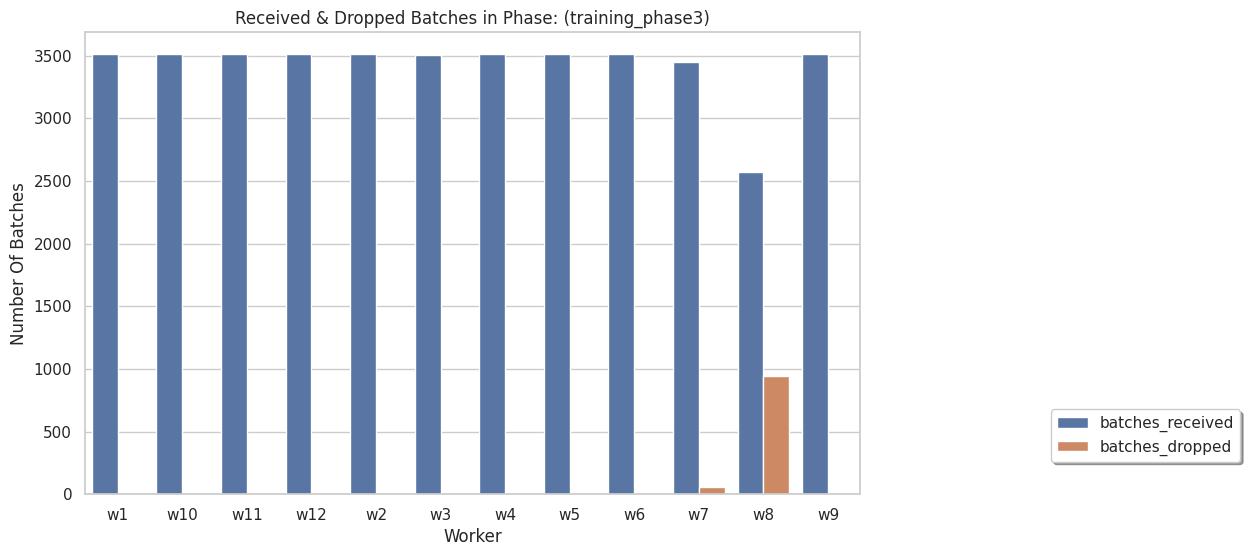

In [25]:
recieved_train = stats_train3.get_recieved_batches()
missed_train = stats_train3.get_missed_batches()
stats_train3.plot_batches_status(plot=True)

In [26]:
file_name = "recieved_batches_train_3.json"
file_path = os.path.join(folder_path, file_name)

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(recieved_train, json_file)

file_name = "missed_batches_train_3.json"
file_path = os.path.join(folder_path, file_name)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(missed_train, json_file)

## Training phase 4:

In [27]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-08-16 16:52:58,797] Experiment phase: training_phase4 of type training starts running...
[INFO][2024-08-16 16:52:58,798] Sending data to sources
[INFO][2024-08-16 16:53:22,826] Data is ready in sources
[INFO][2024-08-16 16:53:22,827] Phase training requested from Main Server
[INFO][2024-08-16 17:11:20,885] Processing experiment phase data
[INFO][2024-08-16 17:11:21,252] Processing experiment phase data completed
[INFO][2024-08-16 17:11:21,253] Start generating communication statistics for training_phase4 of type training
[INFO][2024-08-16 17:11:21,254] Statistics requested from Main Server
[INFO][2024-08-16 17:11:21,307] Statistics received from Main Server
[INFO][2024-08-16 17:11:21,308] Phase of training_phase4 training completed


In [28]:
stats_train4 = API.get_experiment_flow(exp_name).generate_stats()

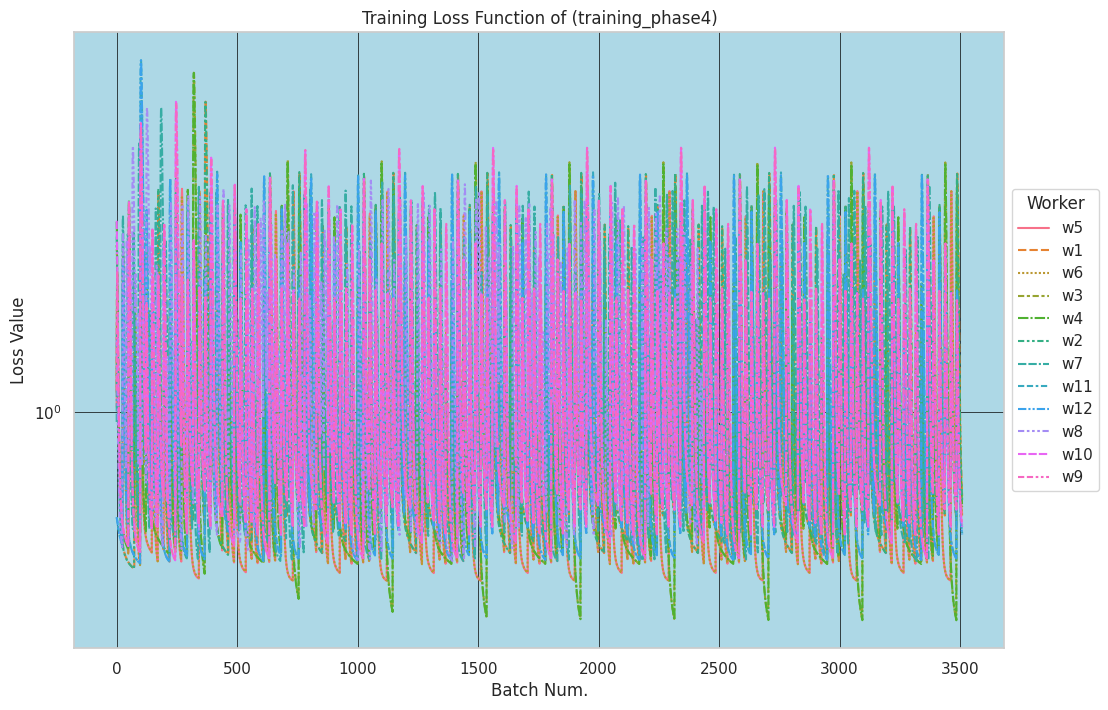

In [29]:
df_loss4 = stats_train4.get_loss_ts(plot=True, smoothing = True, log_plot = True)

In [30]:
os.makedirs(directory, exist_ok=True)
filename = f'train4_loss.csv'
filepath = os.path.join(directory, filename)
df_loss4.to_csv(filepath)

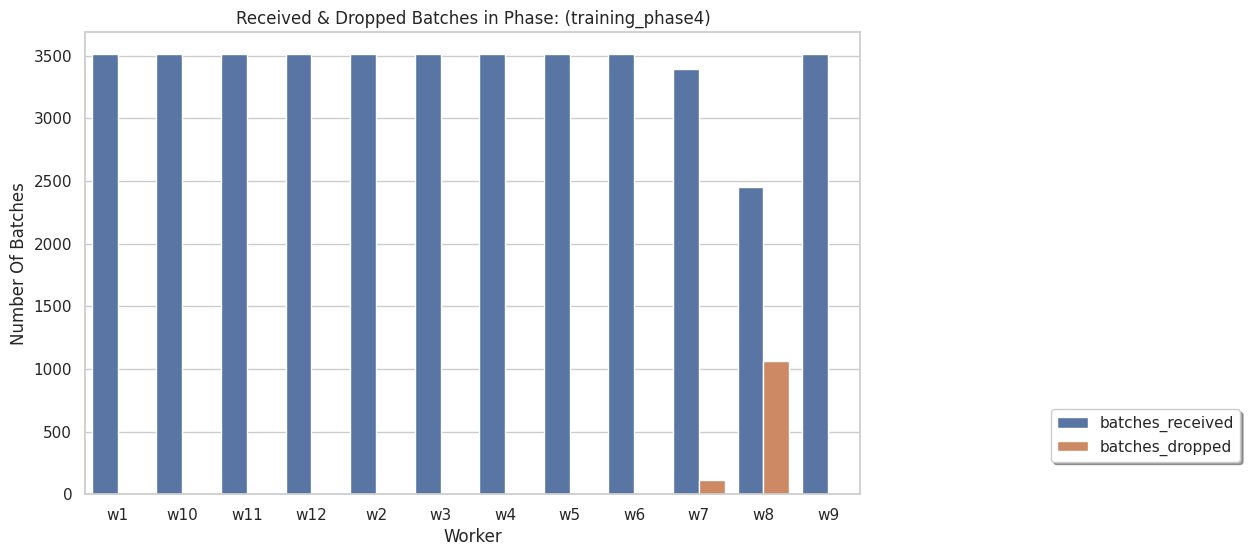

In [31]:
recieved_train = stats_train4.get_recieved_batches()
missed_train = stats_train4.get_missed_batches()
stats_train4.plot_batches_status(plot=True)

In [32]:
file_name = "recieved_batches_train_4.json"
file_path = os.path.join(folder_path, file_name)

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(recieved_train, json_file)

file_name = "missed_batches_train_4.json"
file_path = os.path.join(folder_path, file_name)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(missed_train, json_file)

# <span style="color:red;"> *Score Discretization*: </span> Classes are discretized into 3 slots: 1-3, 4-6, 7-9

## Predictaion phase 1:

In [33]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-08-16 17:11:24,977] Experiment phase: prediction_phase1 of type prediction starts running...
[INFO][2024-08-16 17:11:24,978] Sending data to sources
[INFO][2024-08-16 17:11:35,397] Data is ready in sources
[INFO][2024-08-16 17:11:35,398] Phase prediction requested from Main Server
[INFO][2024-08-16 17:12:37,196] Processing experiment phase data
[INFO][2024-08-16 17:12:37,234] Processing experiment phase data completed
[INFO][2024-08-16 17:12:37,234] Start generating communication statistics for prediction_phase1 of type prediction
[INFO][2024-08-16 17:12:37,235] Statistics requested from Main Server
[INFO][2024-08-16 17:12:37,288] Statistics received from Main Server
[INFO][2024-08-16 17:12:37,289] Phase of prediction_phase1 prediction completed


In [34]:
stats_pred1 = API.get_experiment_flow(exp_name).generate_stats()

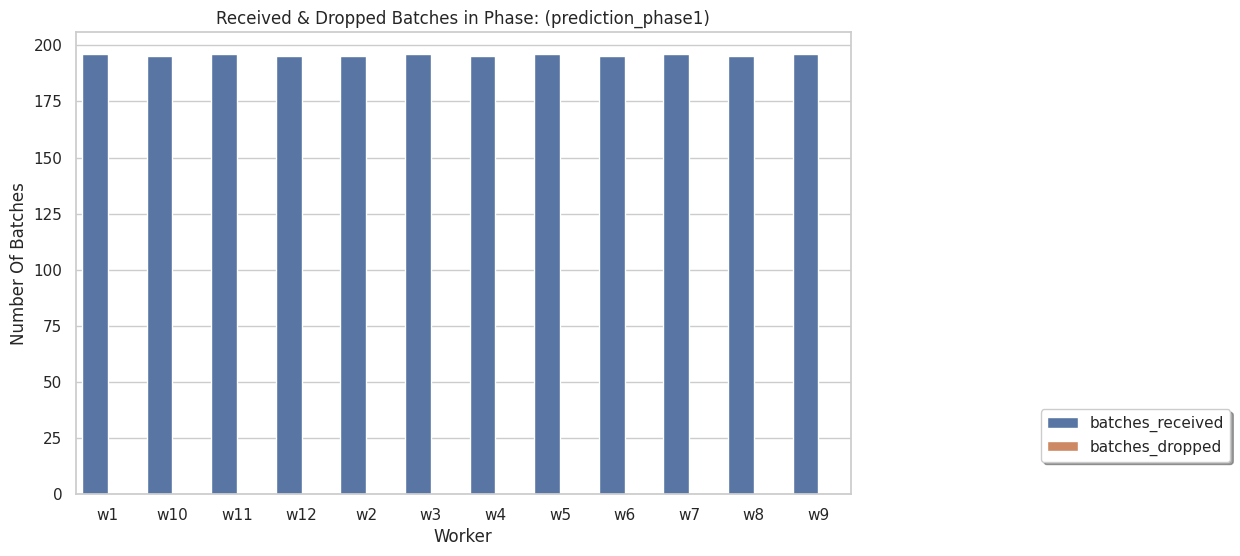

In [35]:
recieved_predict = stats_pred1.get_recieved_batches()
missed_predict = stats_pred1.get_missed_batches()
stats_pred1.plot_batches_status(plot=True)

In [36]:
file_name = "recieved_predict_1.json"
file_path = os.path.join(folder_path, file_name)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(recieved_predict, json_file)

file_name = "missed_predict_1.json"
file_path = os.path.join(folder_path, file_name)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(missed_predict, json_file)

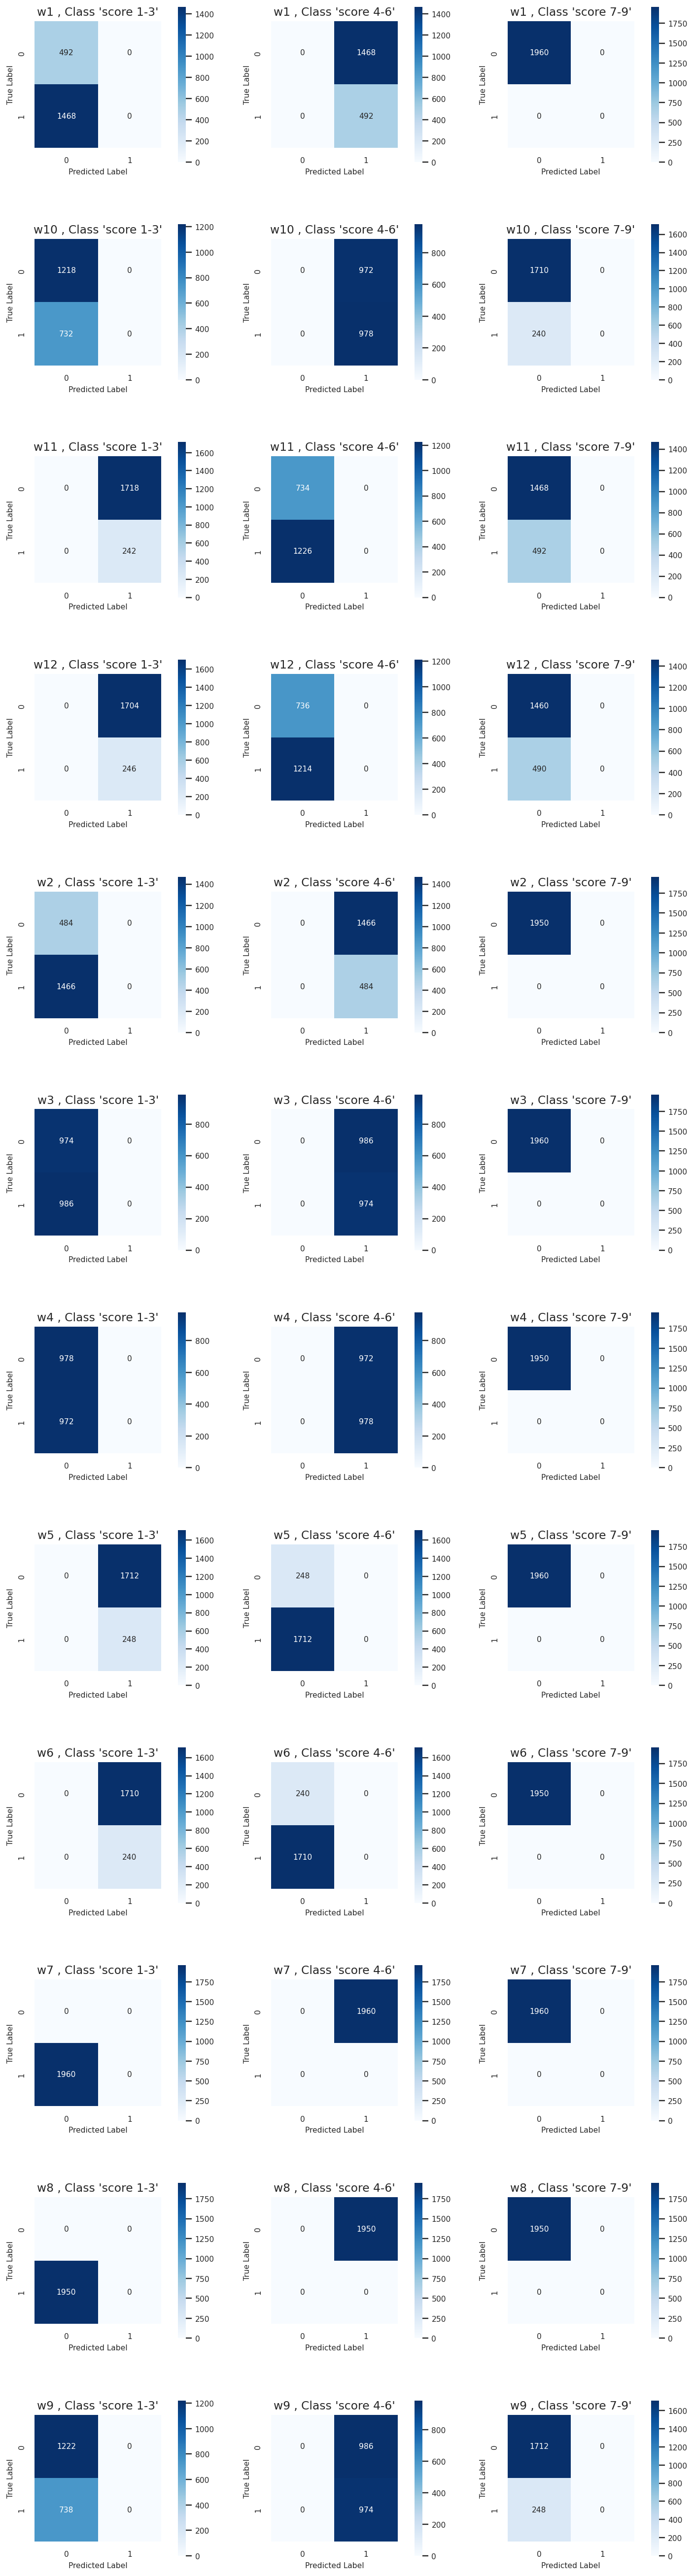

In [37]:
source_conf1 , conf_mats1 = stats_pred1.get_confusion_matrices_eeg(plot=True)

In [38]:
file_name = "conf_mats1.json"
file_path = os.path.join(folder_path, file_name)

conf_mats1_json = {str(key): value.tolist() if isinstance(value, np.ndarray) else value 
              for key, value in conf_mats1.items()}
conf_source1_json = {str(key): value.tolist() if isinstance(value, np.ndarray) else value 
                for key, value in source_conf1.items()}

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(conf_mats1_json, json_file)

file_name = "conf_source1.json"
file_path = os.path.join(folder_path, file_name)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(conf_source1_json, json_file)

In [52]:
model_performence1 = stats_pred1.get_model_performence_stats(conf_mats1)
model_performence1

Worker  Class    TN    FP    FN   TP  Accuracy  Balanced Accuracy  \
0      w1      1   492     0  1468    0  0.251020                0.5   
1      w1      2     0  1468     0  492  0.251020                0.5   
2      w1      3  1960     0     0    0  1.000000                0.5   
3      w2      1   484     0  1466    0  0.248205                0.5   
4      w2      2     0  1466     0  484  0.248205                0.5   
5      w2      3  1950     0     0    0  1.000000                0.5   
6      w4      1   978     0   972    0  0.501538                0.5   
7      w4      2     0   972     0  978  0.501538                0.5   
8      w4      3  1950     0     0    0  1.000000                0.5   
9      w3      1   974     0   986    0  0.496939                0.5   
10     w3      2     0   986     0  974  0.496939                0.5   
11     w3      3  1960     0     0    0  1.000000                0.5   
12     w5      1     0  1712     0  248  0.126531                0.5   
13     w5      2   248     0  1712    0  0.126531                0.5   
14     w5      3  1960     0     0    0  1.000000                0.5   
15     w6      1     0  1710     0  240  0.123077                0.5   
16     w6      2   240     0  1710    0  0.123077                0.5   
17     w6      3  1950     0     0    0  1.000000                0.5   
18     w7      1     0     0  1960    0  0.000000                0.0   
19     w7      2     0  1960     0    0  0.000000                0.0   
20     w7      3  1960     0     0    0  1.000000                0.5   
21     w8      1     0     0  1950    0  0.000000                0.0   
22     w8      2     0  1950     0    0  0.000000                0.0   
23     w8      3  1950     0     0    0  1.000000                0.5   
24    w10      1  1218     0   732    0  0.624615                0.5   
25    w10      2     0   972     0  978  0.501538                0.5   
26    w10      3  1710     0   240    0  0.876923                0.5   
27     w9      1  1222     0   738    0  0.623469                0.5   
28     w9      2     0   986     0  974  0.496939                0.5   
29     w9      3  1712     0   248    0  0.873469                0.5   
30    w11      1     0  1718     0  242  0.123469                0.5   
31    w11      2   734     0  1226    0  0.374490                0.5   
32    w11      3  1468     0   492    0  0.748980                0.5   
33    w12      1     0  1704     0  246  0.126154                0.5   
34    w12      2   736     0  1214    0  0.377436                0.5   
35    w12      3  1460     0   490    0  0.748718                0.5   

    Precision  Recall  True Negative Rate  Informedness        F1  
0    0.000000     0.0                 1.0           0.0  0.000000  
1    0.251020     1.0                 0.0           0.0  0.401305  
2    0.000000     0.0                 1.0           0.0  0.000000  
3    0.000000     0.0                 1.0           0.0  0.000000  
4    0.248205     1.0                 0.0           0.0  0.397699  
5    0.000000     0.0                 1.0           0.0  0.000000  
6    0.000000     0.0                 1.0           0.0  0.000000  
7    0.501538     1.0                 0.0           0.0  0.668033  
8    0.000000     0.0                 1.0           0.0  0.000000  
9    0.000000     0.0                 1.0           0.0  0.000000  
10   0.496939     1.0                 0.0           0.0  0.663940  
11   0.000000     0.0                 1.0           0.0  0.000000  
12   0.126531     1.0                 0.0           0.0  0.224638  
13   0.000000     0.0                 1.0           0.0  0.000000  
14   0.000000     0.0                 1.0           0.0  0.000000  
15   0.123077     1.0                 0.0           0.0  0.219178  
16   0.000000     0.0                 1.0           0.0  0.000000  
17   0.000000     0.0                 1.0           0.0  0.000000  
18   0.000000     0.0                 0.0     

In [40]:
filename = f'predict_performence1.csv'
filepath = os.path.join(directory, filename)
model_performence1.to_csv(filepath)

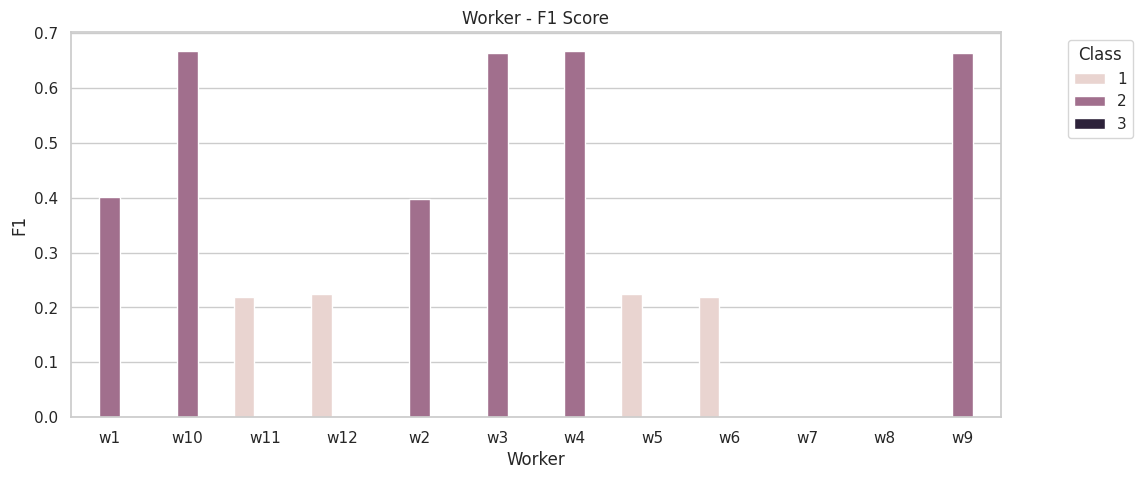

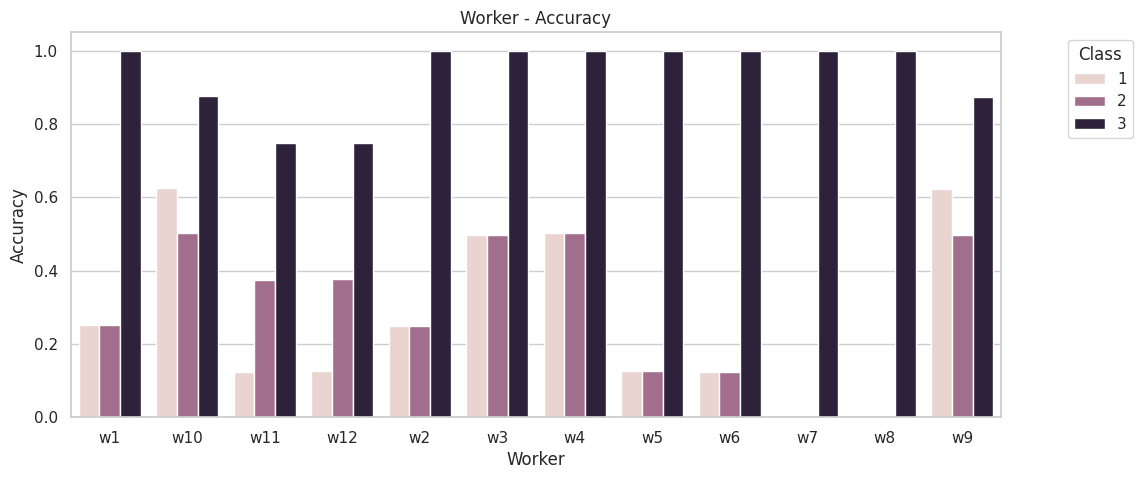

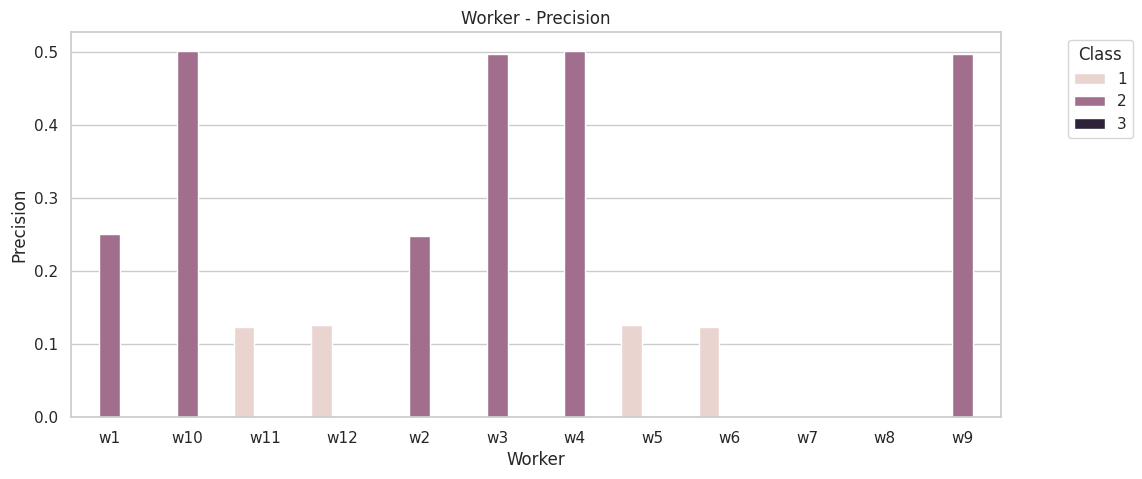

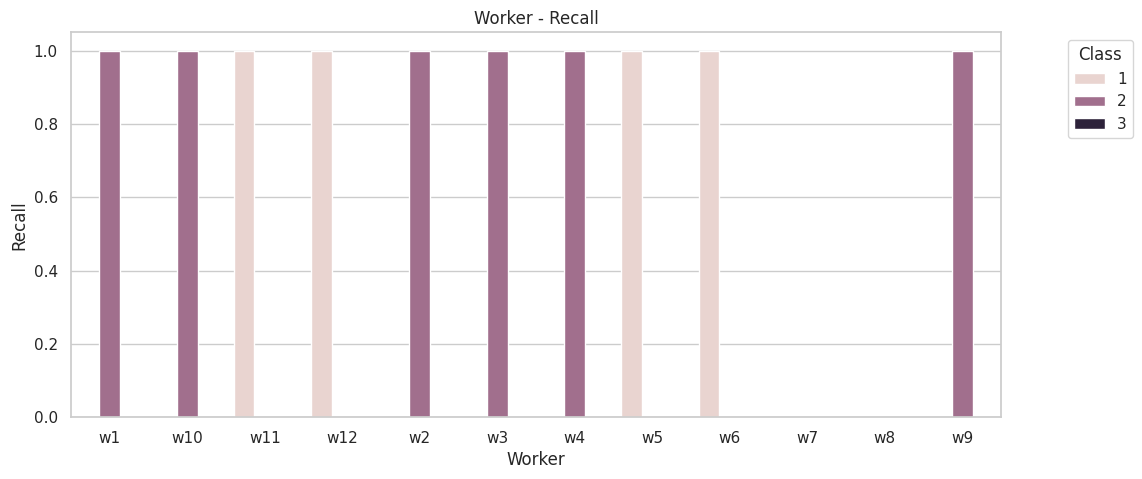

In [41]:
plt.figure(figsize=(12,5))
sns.barplot(data=model_performence1.sort_values('Worker') , x='Worker' , y='F1',hue='Class')
plt.title("Worker - F1 Score")
plt.legend(title='Class', bbox_to_anchor=(1.15, 1), loc='upper right') 
plt.show()
plt.figure(figsize=(12,5))
sns.barplot(data=model_performence1.sort_values('Worker') , x='Worker' , y='Accuracy',hue='Class')
plt.title("Worker - Accuracy")
plt.legend(title='Class', bbox_to_anchor=(1.15, 1), loc='upper right') 
plt.show()
plt.figure(figsize=(12,5))
sns.barplot(data=model_performence1.sort_values('Worker') , x='Worker' , y='Precision',hue='Class')
plt.title("Worker - Precision")
plt.legend(title='Class', bbox_to_anchor=(1.15, 1), loc='upper right') 
plt.show()
plt.figure(figsize=(12,5))
sns.barplot(data=model_performence1.sort_values('Worker') , x='Worker' , y='Recall',hue='Class')
plt.title("Worker - Recall")
plt.legend(title='Class', bbox_to_anchor=(1.15, 1), loc='upper right') 
plt.show()

## Predictaion phase 2:

In [42]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-08-16 17:13:23,942] Experiment phase: prediction_phase2 of type prediction starts running...
[INFO][2024-08-16 17:13:23,943] Sending data to sources
[INFO][2024-08-16 17:13:36,615] Data is ready in sources
[INFO][2024-08-16 17:13:36,616] Phase prediction requested from Main Server
[INFO][2024-08-16 17:14:38,415] Processing experiment phase data
[INFO][2024-08-16 17:14:38,442] Processing experiment phase data completed
[INFO][2024-08-16 17:14:38,443] Start generating communication statistics for prediction_phase2 of type prediction
[INFO][2024-08-16 17:14:38,443] Statistics requested from Main Server
[INFO][2024-08-16 17:14:38,497] Statistics received from Main Server
[INFO][2024-08-16 17:14:38,497] Phase of prediction_phase2 prediction completed


In [43]:
stats_pred2 = API.get_experiment_flow(exp_name).generate_stats()

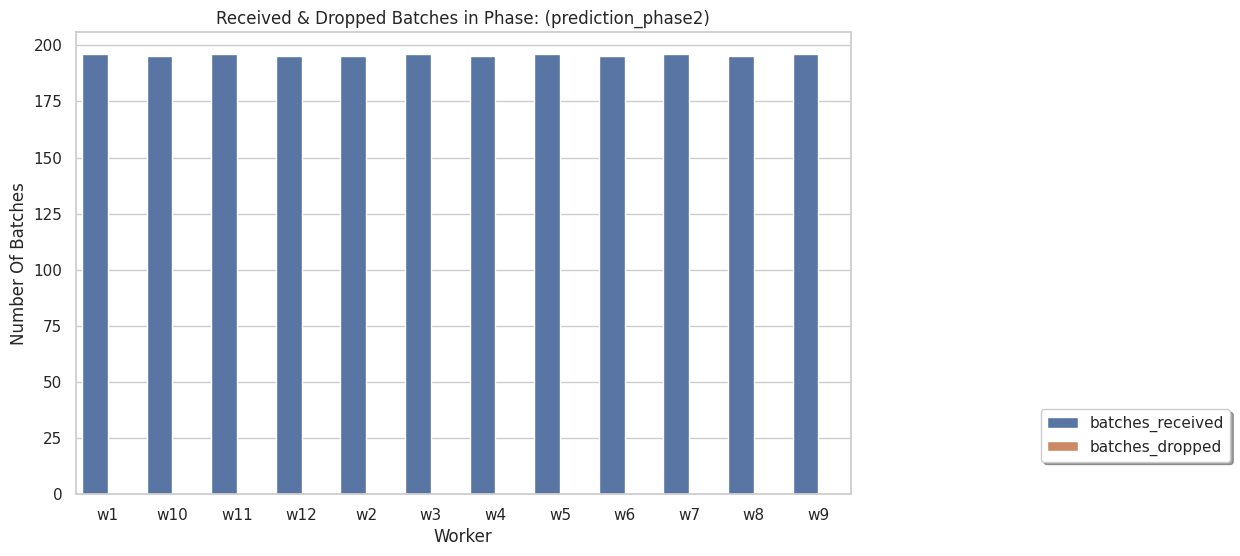

In [44]:
recieved_predict = stats_pred2.get_recieved_batches()
missed_predict = stats_pred2.get_missed_batches()
stats_pred2.plot_batches_status(plot=True)

In [45]:
file_name = "recieved_predict_2.json"
file_path = os.path.join(folder_path, file_name)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(recieved_predict, json_file)

file_name = "missed_predict_2.json"
file_path = os.path.join(folder_path, file_name)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(missed_predict, json_file)

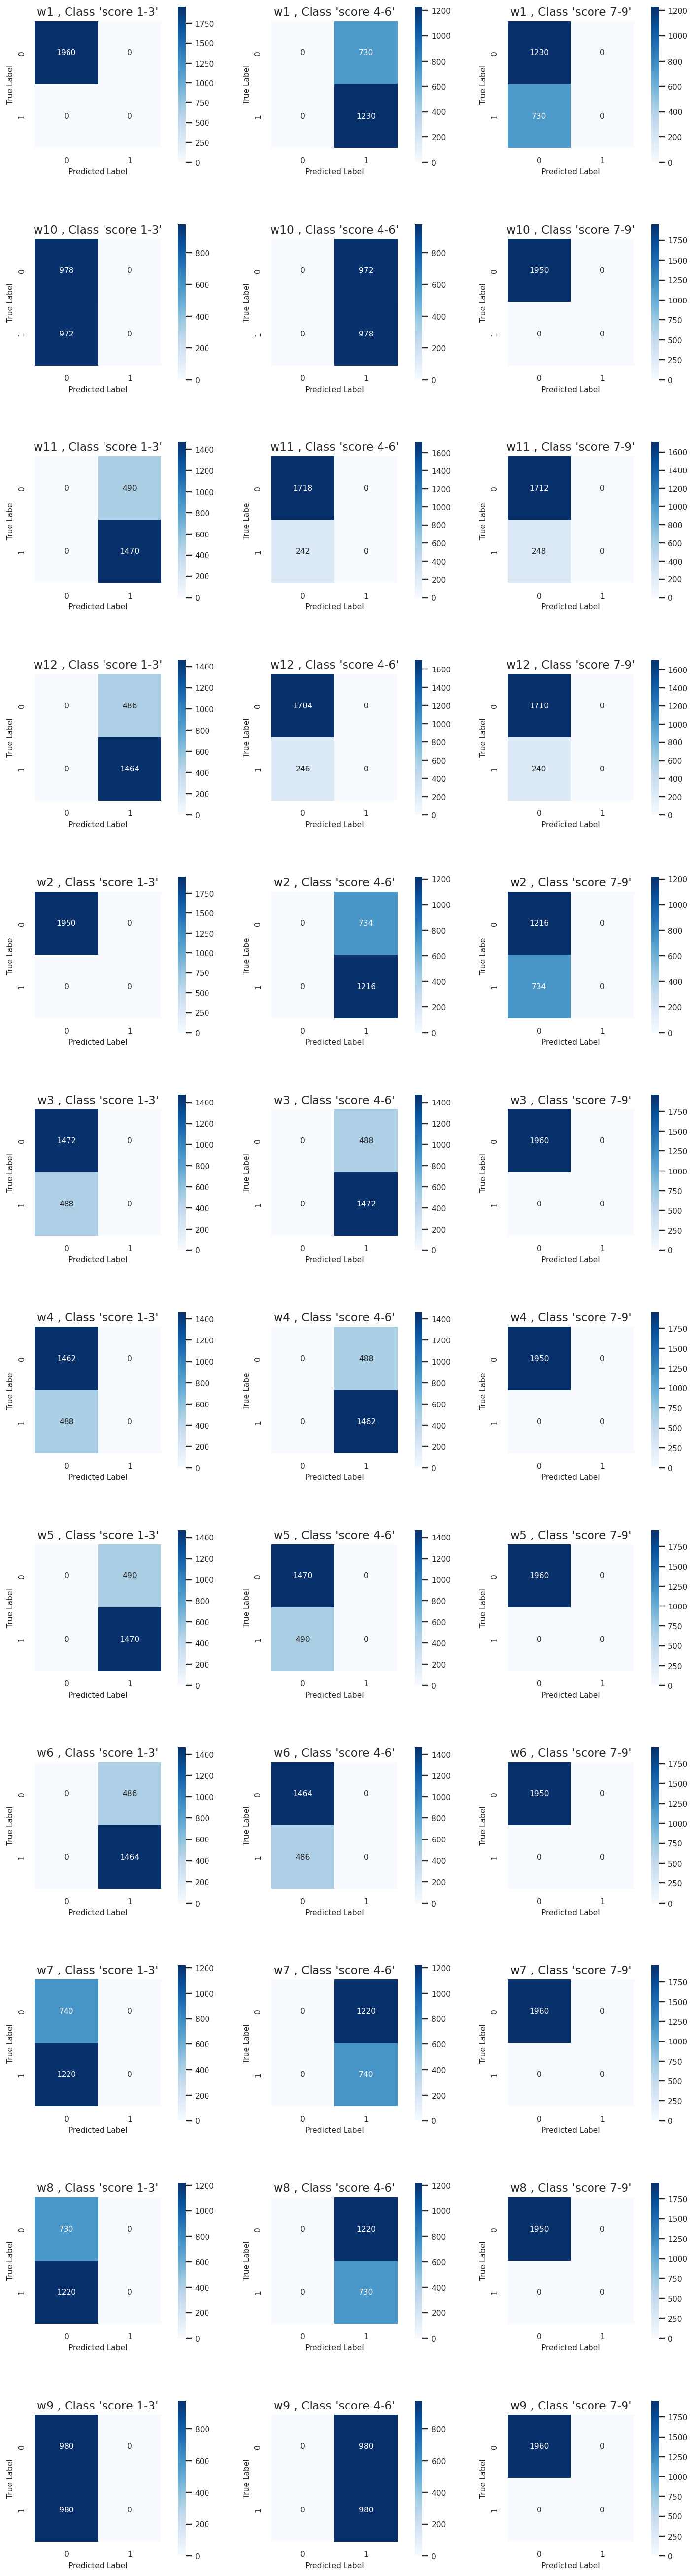

In [46]:
source_conf2 , conf_mats2 = stats_pred2.get_confusion_matrices_eeg(plot=True)

In [47]:
file_name = "conf_mats2.json"
file_path = os.path.join(folder_path, file_name)

conf_mats2_json = {str(key): value.tolist() if isinstance(value, np.ndarray) else value 
              for key, value in conf_mats2.items()}
conf_source2_json = {str(key): value.tolist() if isinstance(value, np.ndarray) else value 
                for key, value in source_conf2.items()}

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(conf_mats2_json, json_file)

file_name = "conf_source2.json"
file_path = os.path.join(folder_path, file_name)

# Save the dictionary as a JSON file in the specified folder
with open(file_path, "w") as json_file:
    json.dump(conf_source2_json, json_file)

In [53]:
model_performence2 = stats_pred2.get_model_performence_stats(conf_mats2)
model_performence2

Worker  Class    TN    FP    FN    TP  Accuracy  Balanced Accuracy  \
0      w1      1  1960     0     0     0  1.000000                0.5   
1      w1      2     0   730     0  1230  0.627551                0.5   
2      w1      3  1230     0   730     0  0.627551                0.5   
3      w2      1  1950     0     0     0  1.000000                0.5   
4      w2      2     0   734     0  1216  0.623590                0.5   
5      w2      3  1216     0   734     0  0.623590                0.5   
6      w3      1  1472     0   488     0  0.751020                0.5   
7      w3      2     0   488     0  1472  0.751020                0.5   
8      w3      3  1960     0     0     0  1.000000                0.5   
9      w4      1  1462     0   488     0  0.749744                0.5   
10     w4      2     0   488     0  1462  0.749744                0.5   
11     w4      3  1950     0     0     0  1.000000                0.5   
12     w5      1     0   490     0  1470  0.750000                0.5   
13     w5      2  1470     0   490     0  0.750000                0.5   
14     w5      3  1960     0     0     0  1.000000                0.5   
15     w6      1     0   486     0  1464  0.750769                0.5   
16     w6      2  1464     0   486     0  0.750769                0.5   
17     w6      3  1950     0     0     0  1.000000                0.5   
18     w7      1   740     0  1220     0  0.377551                0.5   
19     w7      2     0  1220     0   740  0.377551                0.5   
20     w7      3  1960     0     0     0  1.000000                0.5   
21     w8      1   730     0  1220     0  0.374359                0.5   
22     w8      2     0  1220     0   730  0.374359                0.5   
23     w8      3  1950     0     0     0  1.000000                0.5   
24    w10      1   978     0   972     0  0.501538                0.5   
25    w10      2     0   972     0   978  0.501538                0.5   
26    w10      3  1950     0     0     0  1.000000                0.5   
27     w9      1   980     0   980     0  0.500000                0.5   
28     w9      2     0   980     0   980  0.500000                0.5   
29     w9      3  1960     0     0     0  1.000000                0.5   
30    w12      1     0   486     0  1464  0.750769                0.5   
31    w12      2  1704     0   246     0  0.873846                0.5   
32    w12      3  1710     0   240     0  0.876923                0.5   
33    w11      1     0   490     0  1470  0.750000                0.5   
34    w11      2  1718     0   242     0  0.876531                0.5   
35    w11      3  1712     0   248     0  0.873469                0.5   

    Precision  Recall  True Negative Rate  Informedness        F1  
0    0.000000     0.0                 1.0           0.0  0.000000  
1    0.627551     1.0                 0.0           0.0  0.771160  
2    0.000000     0.0                 1.0           0.0  0.000000  
3    0.000000     0.0                 1.0           0.0  0.000000  
4    0.623590     1.0                 0.0           0.0  0.768162  
5    0.000000     0.0                 1.0           0.0  0.000000  
6    0.000000     0.0                 1.0           0.0  0.000000  
7    0.751020     1.0                 0.0           0.0  0.857809  
8    0.000000     0.0                 1.0           0.0  0.000000  
9    0.000000     0.0                 1.0           0.0  0.000000  
10   0.749744     1.0                 0.0           0.0  0.856975  
11   0.000000     0.0                 1.0           0.0  0.000000  
12   0.750000     1.0                 0.0           0.0  0.857143  
13   0.000000     0.0                 1.0           0.0  0.000000  
14   0.000000     0.0                 1.0           0.0  0.000000  
15   0.750769     1.0                 0.0           0.0  0.857645  
16   0.000000     0.0                 1.0           0.0  0.000000  
17   0.000000     0.0                 1.0           0.0  0.000000  
18   0.00

In [49]:
filename = f'predict_performence2.csv'
filepath = os.path.join(directory, filename)
model_performence2.to_csv(filepath)

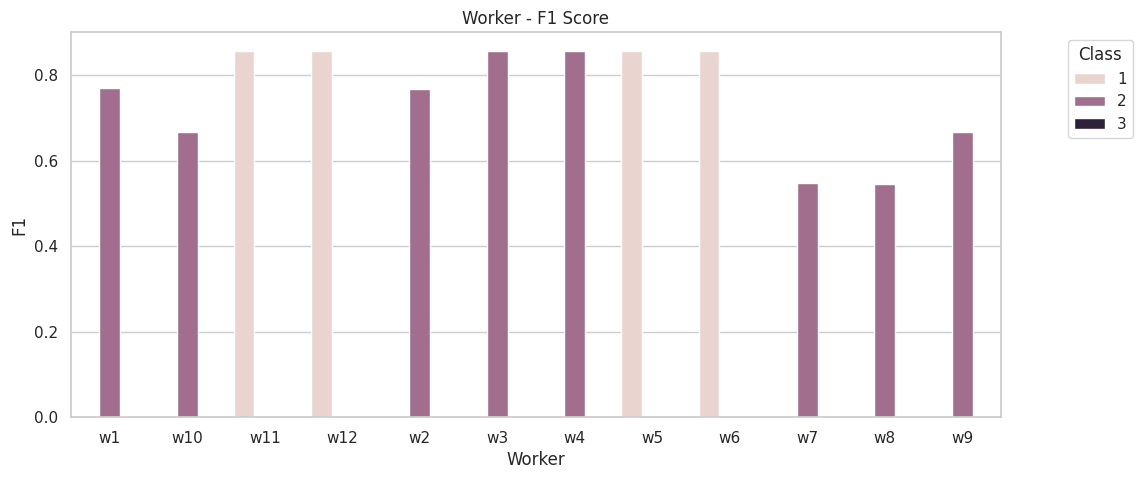

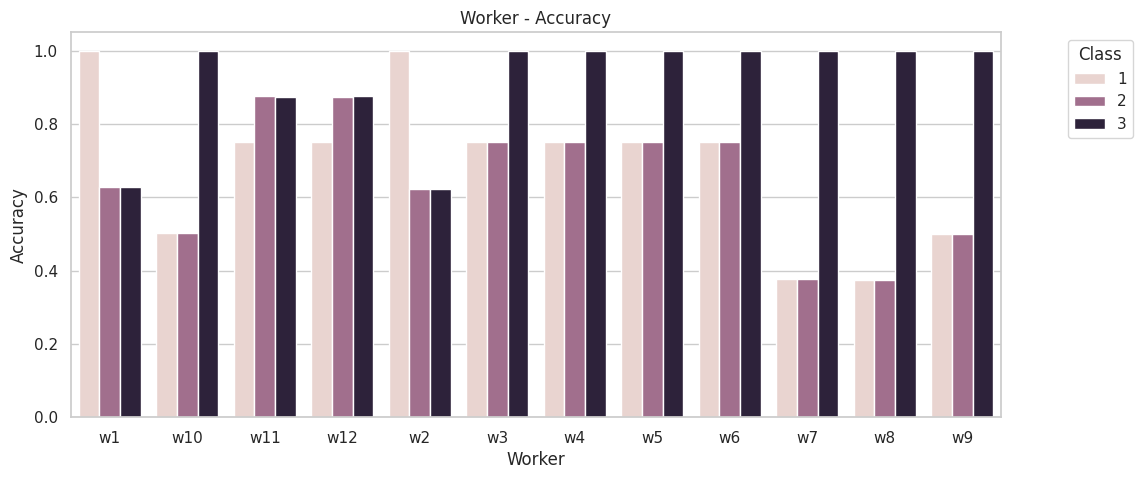

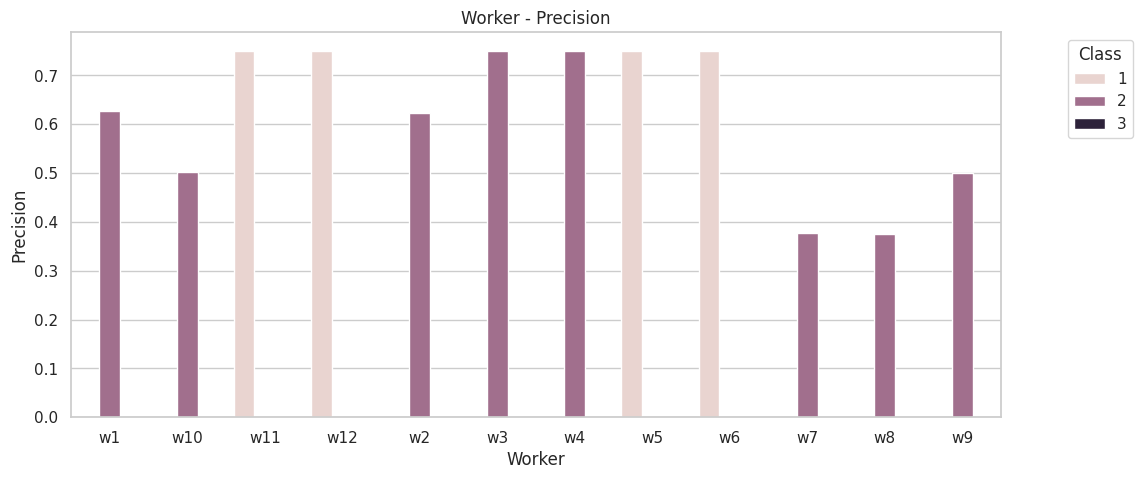

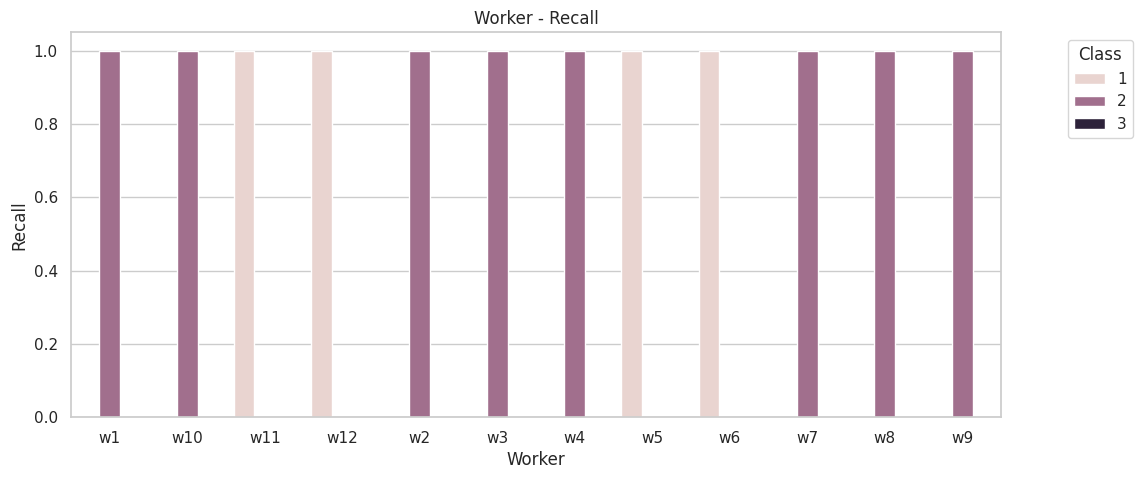

In [50]:
plt.figure(figsize=(12,5))
sns.barplot(data=model_performence2.sort_values('Worker') , x='Worker' , y='F1',hue='Class')
plt.title("Worker - F1 Score")
plt.legend(title='Class', bbox_to_anchor=(1.15, 1), loc='upper right') 
plt.show()
plt.figure(figsize=(12,5))
sns.barplot(data=model_performence2.sort_values('Worker') , x='Worker' , y='Accuracy',hue='Class')
plt.title("Worker - Accuracy")
plt.legend(title='Class', bbox_to_anchor=(1.15, 1), loc='upper right') 
plt.show()
plt.figure(figsize=(12,5))
sns.barplot(data=model_performence2.sort_values('Worker') , x='Worker' , y='Precision',hue='Class')
plt.title("Worker - Precision")
plt.legend(title='Class', bbox_to_anchor=(1.15, 1), loc='upper right') 
plt.show()
plt.figure(figsize=(12,5))
sns.barplot(data=model_performence2.sort_values('Worker') , x='Worker' , y='Recall',hue='Class')
plt.title("Worker - Recall")
plt.legend(title='Class', bbox_to_anchor=(1.15, 1), loc='upper right') 
plt.show()